<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="500" height="250" /> 
    
    
# <font color='navy'> Information-based Models

<font color='black'>

- Luis Fernando Márquez Bañuelos

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

In [2]:
def erlang(lam: int, k: int, S: np.ndarray) -> np.ndarray:
    return lam**k * S**(k-1) * np.exp(-lam*S) / math.factorial(k-1)

def pi_lb(spread: np.ndarray | float) -> np.ndarray | float:
    p = 0.5 - 0.08 * spread
    return np.maximum(p, 0)

def pi_ls(spread: np.ndarray | float) -> np.ndarray | float:
    p = 0.5 - 0.08 * spread
    return np.maximum(p, 0)

## <font color='cornflowerblue'> Plot Price Distribution

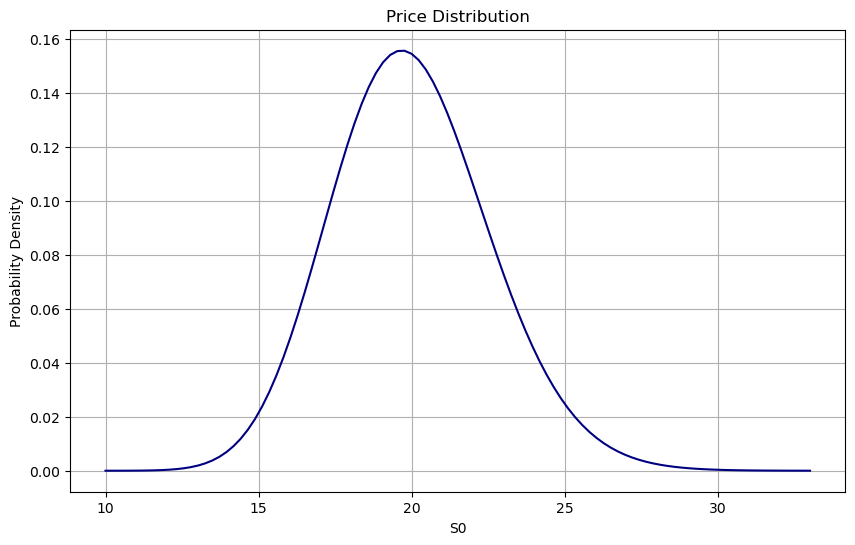

In [3]:
lam = 3
k = 60
S = np.linspace(10, 33, 100)
distr = erlang(lam, k, S)

plt.figure(figsize=(10, 6))
plt.plot(S, distr, c = 'navy')
plt.title("Price Distribution")
plt.xlabel("S0")
plt.ylabel("Probability Density")
plt.grid()
plt.show()

## <font color='cornflowerblue'> Expected Revenues

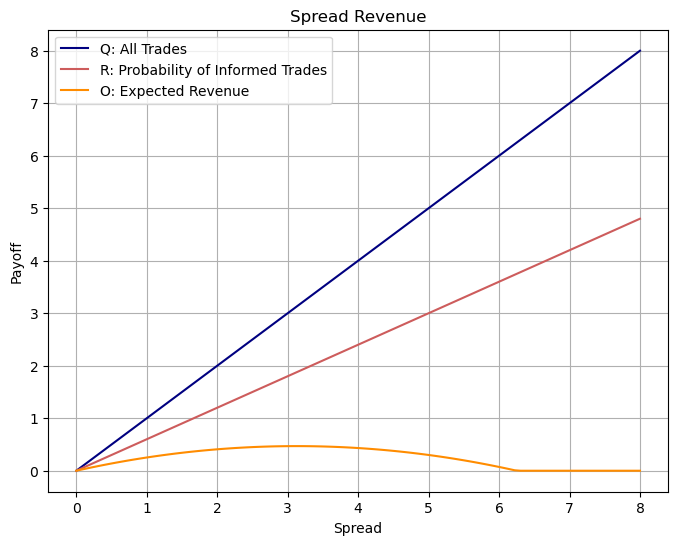

In [4]:
spread = np.linspace(0, 8, 100)
expected_gain = pi_lb(spread) * 0.6 * spread

plt.figure(figsize=(8, 6))
plt.plot(spread, spread, c = 'navy', label='Q: All Trades')
plt.plot(spread, 0.6*spread, c = 'indianred', label='R: Probability of Informed Trades')
plt.plot(spread, expected_gain, c = 'darkorange', label='O: Expected Revenue')

plt.title("Spread Revenue")
plt.xlabel("Spread")
plt.ylabel("Payoff")
plt.legend()
plt.grid()
plt.show()

## <font color='cornflowerblue'> Optimal Bid-Ask

In [5]:
S0 = 19.90
ka = 20.10
kb = 19.30
pi_i = 0.4

In [6]:
def objective(x):
    ka, kb = x
    
    p1 = (1 - pi_i) * (pi_lb(ka - S0) * (ka - S0) + pi_ls(S0 - kb) * (S0 - kb))
    p2 = quad(lambda S: (S - ka) * erlang(lam, k, S), ka, np.inf)[0]
    p3 = quad(lambda S: (kb - S) * erlang(lam, k, S), 0, kb)[0]

    return -(p1 - pi_i * (p2 + p3))

x0 = [S0+1, S0-1]
bounds = [(0, None), (0, None)]
constraint = {'type': 'ineq', 'fun': lambda x: x[0] - x[1]}  

res = minimize(objective, x0, method="SLSQP", bounds=bounds, constraints=constraint)

ka_opt, kb_opt = res.x
print("Ask óptimo:", ka_opt)
print("Bid óptimo:", kb_opt)
print("Valor máximo de F:", -res.fun)

Ask óptimo: 23.428366865801436
Bid óptimo: 16.45142002291402
Valor máximo de F: 0.8402846503893766


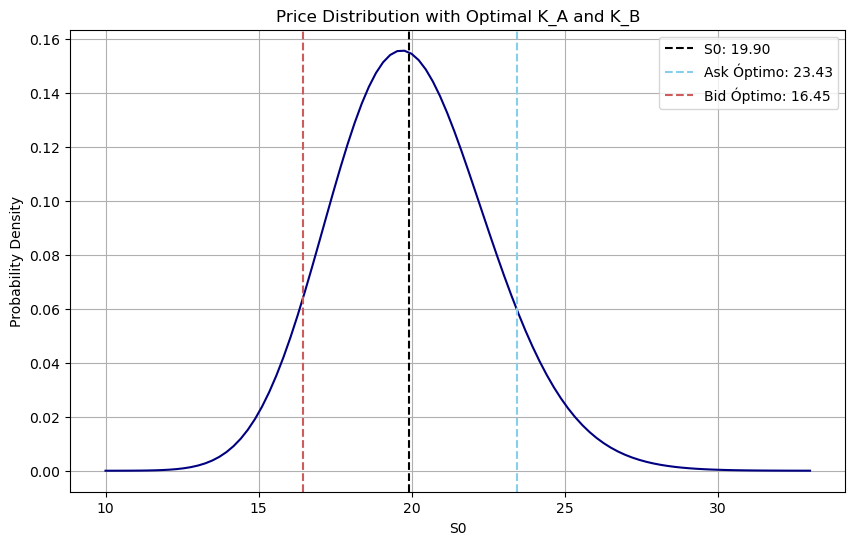

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(S, distr, c = 'navy')
plt.axvline(S0, color='black', linestyle='--', label=f'S0: {S0:.2f}')
plt.axvline(ka_opt, color='skyblue', linestyle='--', label=f'Ask Óptimo: {ka_opt:.2f}')
plt.axvline(kb_opt, color='indianred', linestyle='--', label=f'Bid Óptimo: {kb_opt:.2f}')
plt.title("Price Distribution with Optimal K_A and K_B")
plt.xlabel("S0")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()